
# Practical work: Multi-dimensional minimization
**Marc Buffat** Dpt mécanique, UCB Lyon 1
![Minimisation 2D](Images/minimisation2D.jpg)

In [1]:
%matplotlib inline
#algèbre linéaire
import numpy as np
import sympy as sp
import time
#représentation des résultats
import matplotlib.pyplot as plt
from IPython.display import display,Markdown
def printmd(text):
    display(Markdown(text))
plt.rc('font', family='serif', size='18')

In [2]:
from validation.validation import info_etudiant
def printmd(string):
    display(Markdown(string))
# test si numero étudiant spécifier
try: NUMERO_ETUDIANT
except NameError: NUMERO_ETUDIANT = None 
if type(NUMERO_ETUDIANT) is not int :
    printmd("**ERREUR:** numéro d'étudiant non spécifié!!!")
    NOM,PRENOM,NUMERO_ETUDIANT=info_etudiant()
    #raise AssertionError("NUMERO_ETUDIANT non défini")
# parametres spécifiques
_uid_    = NUMERO_ETUDIANT
np.random.seed(_uid_)
printmd("**Login étudiant {} {} uid={}**".format(NOM,PRENOM,_uid_))
# fonctionnelle a minimiser
import pwd,sys
libpath=pwd.getpwnam('cours')[5]+'/IntroIA/lib'
sys.path.insert(0, libpath)
from Fonctionnelle import Fonctionnelle
J = Fonctionnelle(_uid_)
printmd("**Fonctionnelle J à minimiser**")
J.info()

**ERREUR:** numéro d'étudiant non spécifié!!!

**Login étudiant Marc Buffat uid=137764122**

**Fonctionnelle J à minimiser**

Fonctionnelle J(X) 
dimension de X : 43
minimum   de J : -1.7692176662626187
pour ||X|| < 1.0


## Objectives

Find the vector X  minimizing  the function J(X).

The function  J() is written in Python as an object (i.e. a class instance)

  -  J         : object name
  -  J.dim()   : dimension of X, i.e. number of variables
  -  J(X)      : calculate the value of J  for a given vector X of dimension J.dim()
  -  J.grad(X) : calculate the gradient of J at X
  -  J.err(X)  : calculate the norm of the error ||X-Xe|| where Xe minimize J(X)
  -  J.min()   : calculate the minimum of J


## 1D Minimization

Study of the minimization of $J(\mathbf{X})$  in a given direction $\mathbf{D}$ 

Given a vector $D$, we will minimize  $J(\alpha \mathbf{D})$ (as a 1D function of $\alpha$)

In the following cells:

 - calculate $J(\alpha \mathbf{D})$ for different values of $\alpha$  between -2 and 2
 - plot the function $J(\alpha)$
 - use the function `minimize_scalar`  in scipy to calculate $\alpha$ that minimize $J(\alpha)$ 
 - put the result in the variable `alpha_min`

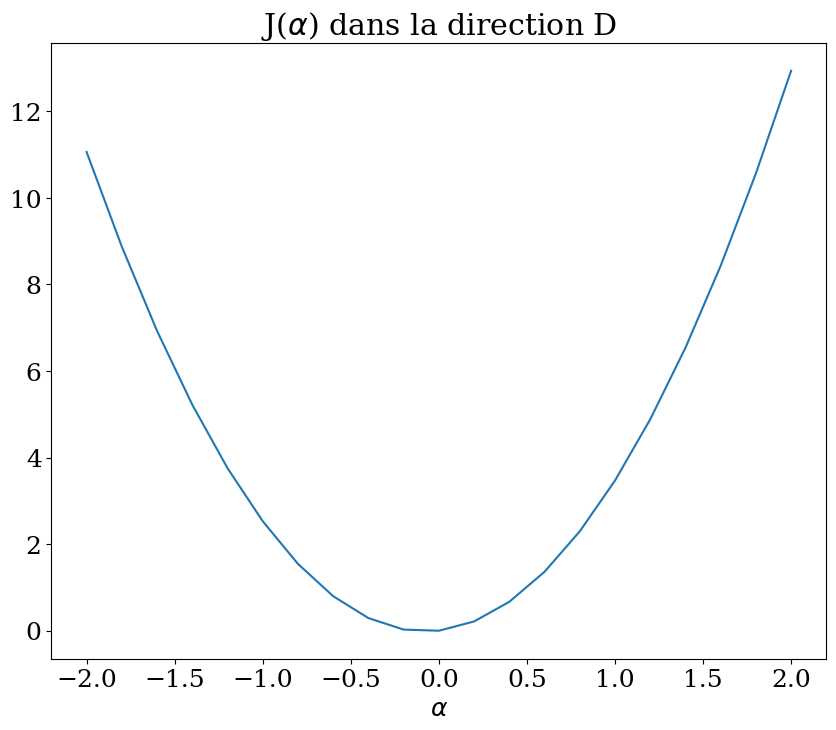

In [3]:
# calcul variation dans une direction D
D = np.zeros(J.dim())
D[NUMERO_ETUDIANT % J.dim()] = 1
Alpha = None
JAlpha = None

### BEGIN SOLUTION
Alpha  = np.linspace(-2,2,21)
JAlpha = np.array([J(alpha*D) for alpha in Alpha])
plt.figure(figsize=(10,8))
plt.plot(Alpha,JAlpha)
plt.xlabel("$\\alpha$")
plt.title("J($\\alpha$) dans la direction D");
### END SOLUTION

In [5]:
from scipy.optimize import minimize_scalar

alpha_min = None
### BEGIN SOLUTION
F = lambda alpha:J(alpha*D)
res = minimize_scalar(F,method='Brent')
print("Jmin=",res.fun)
alpha_min = res.x
print("solution alpha=",alpha_min)
X = alpha_min*D
print("err=",J.err(X))
res
### END SOLUTION

Jmin= -0.018356381667365942
solution alpha= -0.07822271977579136
err= 1.3365604110647604


     fun: -0.018356381667365942
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 9
     nit: 5
 success: True
       x: -0.07822271977579136

In [6]:
print(f"alpha={alpha_min} minimise J suivant D\n",D)
assert(J.err1D(alpha_min,D)<1.e-5)


alpha=-0.07822271977579136 minimise J suivant D
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


## multi-dimensional minimization

use of the `scipy` library

  - function **minimize** (local minimization)
    
       - method using exact gradient : Conjugate Gradients, Newton GC, 
       - méthod using approximate gradient : BFGS, 
       - line search Powell, Simplex Nelder-Mead
 
  - global optimization
       - simulated annealing
       
In the following cell, define 2 new functions :

  - **F(X)** to calculate J(X)
  - **Fgrad(X)** to calculate the gradient
  
we use python functions because the minimization function does not allow class method.


In [7]:
F = None
Fgrad = None
### BEGIN SOLUTION
F = lambda X:J(X)
Fgrad = lambda X:J.grad(X)
### END SOLUTION
X0 = np.zeros(J.dim())

In [8]:
print("solution initiale X0:\n",X0)
assert np.allclose(F(X0),J(X0))
assert np.allclose(Fgrad(X0),J.grad(X0))


solution initiale X0:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Using the default minimize method

for each method, we have too:

 - calculate the solution Xe, 
 - calculate the value of J(Xe) 
 - calculate the error (that should be less than  1.e-5)
 
 We have to prescribe the optional parameters in order to obtain the prescribed precision


In [9]:
from scipy.optimize import minimize

Xe = None
### BEGIN SOLUTION




res = minimize(F, X0,options={'disp':True})
Xe = res.x
print("Jmin=",res.fun,res.message)
print('solution J(Xe)={J(Xe)} pour Xe:\n',Xe)
print("Erreur = ",J.err(Xe))
### END SOLUTION

Optimization terminated successfully.
         Current function value: -1.769218
         Iterations: 26
         Function evaluations: 1892
         Gradient evaluations: 43
Jmin= -1.7692176662300487 Optimization terminated successfully.
solution J(Xe)={J(Xe)} pour Xe:
 [ 0.37669918  0.04732011 -0.05940649  0.24743477  0.10194774  0.04459199
  0.2055494   0.02195719  0.03798921  0.44592216  0.54024207  0.29085525
 -0.11742665  0.17566061  0.13499799  0.10380402 -0.12442165  0.27601026
 -0.22541099  0.07267744  0.12516504  0.27537964  0.19022757  0.03809751
  0.21712651 -0.00406926  0.07766845 -0.10208459 -0.01725832  0.08505747
 -0.07205853  0.15775654  0.0656164   0.1119071  -0.06764155  0.45226148
 -0.05877663  0.03460216  0.02844344  0.08316676  0.20954805  0.02630892
  0.46411401]
Erreur =  5.948601093868153e-06


In [10]:
print(f"J={J(Xe)} avec erreur={J.err(Xe)} pour  X:\n",Xe)
assert( J.err(Xe) < 1.e-5)


J=-1.7692176662300487 avec erreur=5.948601093868153e-06 pour  X:
 [ 0.37669918  0.04732011 -0.05940649  0.24743477  0.10194774  0.04459199
  0.2055494   0.02195719  0.03798921  0.44592216  0.54024207  0.29085525
 -0.11742665  0.17566061  0.13499799  0.10380402 -0.12442165  0.27601026
 -0.22541099  0.07267744  0.12516504  0.27537964  0.19022757  0.03809751
  0.21712651 -0.00406926  0.07766845 -0.10208459 -0.01725832  0.08505747
 -0.07205853  0.15775654  0.0656164   0.1119071  -0.06764155  0.45226148
 -0.05877663  0.03460216  0.02844344  0.08316676  0.20954805  0.02630892
  0.46411401]


### Conjugate gradient Method


In [11]:
Xe = None
### BEGIN SOLUTION
res = minimize(F, X0, jac=Fgrad, method='CG',options={'disp':True})
print("Jmin=",res.fun,res.message)
Xe = res.x
print('solution J(Xe)={J(Xe)} pour Xe:\n',Xe)
print("Erreur = ",J.err(Xe))
### END SOLUTION

Optimization terminated successfully.
         Current function value: -1.769218
         Iterations: 20
         Function evaluations: 41
         Gradient evaluations: 41
Jmin= -1.7692176662297676 Optimization terminated successfully.
solution J(Xe)={J(Xe)} pour Xe:
 [ 0.37669861  0.04732022 -0.05940598  0.24743562  0.1019499   0.04459283
  0.20555072  0.02195744  0.03799154  0.44592203  0.54024449  0.2908546
 -0.11742708  0.17566174  0.13500079  0.10380474 -0.12442238  0.27600939
 -0.22540979  0.07267734  0.12516579  0.2753805   0.19023037  0.03809888
  0.21712764 -0.00406822  0.07766976 -0.10208394 -0.01725912  0.08505799
 -0.07205764  0.15775932  0.06561639  0.11191097 -0.06764046  0.45226228
 -0.05877647  0.03460051  0.02844238  0.08316826  0.20954934  0.02630826
  0.46411377]
Erreur =  4.636842973251503e-06


In [12]:
print(f"J={J(Xe)} avec erreur={J.err(Xe)} pour  X:\n",Xe)
assert( J.err(Xe) < 1.e-5)


J=-1.7692176662297676 avec erreur=4.636842973251503e-06 pour  X:
 [ 0.37669861  0.04732022 -0.05940598  0.24743562  0.1019499   0.04459283
  0.20555072  0.02195744  0.03799154  0.44592203  0.54024449  0.2908546
 -0.11742708  0.17566174  0.13500079  0.10380474 -0.12442238  0.27600939
 -0.22540979  0.07267734  0.12516579  0.2753805   0.19023037  0.03809888
  0.21712764 -0.00406822  0.07766976 -0.10208394 -0.01725912  0.08505799
 -0.07205764  0.15775932  0.06561639  0.11191097 -0.06764046  0.45226228
 -0.05877647  0.03460051  0.02844238  0.08316826  0.20954934  0.02630826
  0.46411377]


### Conjugate gradient Method with Newton 


In [13]:
Xe = None
### BEGIN SOLUTION
res = minimize(F, X0, jac=Fgrad, method='Newton-CG',options={'disp':True})
print("Jmin=",res.fun,res.message)
Xe = res.x
print('solution J(Xe)={J(Xe)} pour Xe:\n',Xe)
print("Erreur = ",J.err(Xe))
### END SOLUTION

Optimization terminated successfully.
         Current function value: -1.769218
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 77
         Hessian evaluations: 0
Jmin= -1.7692176662626165 Optimization terminated successfully.
solution J(Xe)={J(Xe)} pour Xe:
 [ 0.37670016  0.04732056 -0.05940647  0.24743543  0.10194923  0.04459226
  0.20555026  0.02195688  0.03799023  0.44592269  0.54024409  0.29085522
 -0.11742721  0.1756614   0.13499967  0.10380462 -0.12442221  0.27600989
 -0.22541077  0.07267732  0.12516558  0.27537939  0.19022893  0.03809801
  0.2171283  -0.00406866  0.0776689  -0.10208422 -0.01725887  0.08505769
 -0.07205837  0.1577582   0.06561628  0.11190963 -0.06764064  0.45226276
 -0.05877668  0.03460125  0.02844297  0.08316746  0.2095486   0.02630885
  0.46411378]
Erreur =  5.184269262151714e-08


In [14]:
print(f"J={J(Xe)} avec erreur={J.err(Xe)} pour  X:\n",Xe)
assert( J.err(Xe) < 1.e-5)


J=-1.7692176662626165 avec erreur=5.184269262151714e-08 pour  X:
 [ 0.37670016  0.04732056 -0.05940647  0.24743543  0.10194923  0.04459226
  0.20555026  0.02195688  0.03799023  0.44592269  0.54024409  0.29085522
 -0.11742721  0.1756614   0.13499967  0.10380462 -0.12442221  0.27600989
 -0.22541077  0.07267732  0.12516558  0.27537939  0.19022893  0.03809801
  0.2171283  -0.00406866  0.0776689  -0.10208422 -0.01725887  0.08505769
 -0.07205837  0.1577582   0.06561628  0.11190963 -0.06764064  0.45226276
 -0.05877668  0.03460125  0.02844297  0.08316746  0.2095486   0.02630885
  0.46411378]


### Method BFGS (use of a numerical approximation of the gradient)


In [15]:
Xe = None
### BEGIN SOLUTION
res = minimize(F, X0, method='BFGS',options={'disp':True})
print("Jmin=",res.fun,res.message)
Xe = res.x
print('solution J(Xe)={J(Xe)} pour Xe:\n',Xe)
print("Erreur = ",J.err(Xe))
### END SOLUTION

Optimization terminated successfully.
         Current function value: -1.769218
         Iterations: 26
         Function evaluations: 1892
         Gradient evaluations: 43
Jmin= -1.7692176662300487 Optimization terminated successfully.
solution J(Xe)={J(Xe)} pour Xe:
 [ 0.37669918  0.04732011 -0.05940649  0.24743477  0.10194774  0.04459199
  0.2055494   0.02195719  0.03798921  0.44592216  0.54024207  0.29085525
 -0.11742665  0.17566061  0.13499799  0.10380402 -0.12442165  0.27601026
 -0.22541099  0.07267744  0.12516504  0.27537964  0.19022757  0.03809751
  0.21712651 -0.00406926  0.07766845 -0.10208459 -0.01725832  0.08505747
 -0.07205853  0.15775654  0.0656164   0.1119071  -0.06764155  0.45226148
 -0.05877663  0.03460216  0.02844344  0.08316676  0.20954805  0.02630892
  0.46411401]
Erreur =  5.948601093868153e-06


In [16]:
print(f"J={J(Xe)} avec erreur={J.err(Xe)} pour  X:\n",Xe)
assert( J.err(Xe) < 1.e-5)


J=-1.7692176662300487 avec erreur=5.948601093868153e-06 pour  X:
 [ 0.37669918  0.04732011 -0.05940649  0.24743477  0.10194774  0.04459199
  0.2055494   0.02195719  0.03798921  0.44592216  0.54024207  0.29085525
 -0.11742665  0.17566061  0.13499799  0.10380402 -0.12442165  0.27601026
 -0.22541099  0.07267744  0.12516504  0.27537964  0.19022757  0.03809751
  0.21712651 -0.00406926  0.07766845 -0.10208459 -0.01725832  0.08505747
 -0.07205853  0.15775654  0.0656164   0.1119071  -0.06764155  0.45226148
 -0.05877663  0.03460216  0.02844344  0.08316676  0.20954805  0.02630892
  0.46411401]


### Powell Algorithm (line search 2D)

In [17]:
Xe = None
### BEGIN SOLUTION
res = minimize(F, X0, method='Powell',options={'disp':True,'xtol':1.e-8,'ftol':1.0e-8})
print("Jmin=",res.fun,res.message)
Xe = res.x
print('solution J(Xe)={J(Xe)} pour Xe:\n',Xe)
print("Erreur = ",J.err(Xe))
### END SOLUTION

Optimization terminated successfully.
         Current function value: -1.769218
         Iterations: 15
         Function evaluations: 11745
Jmin= -1.7692176530299948 Optimization terminated successfully.
solution J(Xe)={J(Xe)} pour Xe:
 [ 0.37667005  0.04731831 -0.0594059   0.24742969  0.10194837  0.04459097
  0.20554676  0.02193932  0.03799056  0.44591172  0.540236    0.29083952
 -0.11742493  0.175661    0.13499505  0.10380322 -0.12441626  0.27598852
 -0.2254106   0.07267111  0.12514853  0.27537008  0.19022729  0.03809785
  0.21702824 -0.00405411  0.07766853 -0.10208704 -0.0172583   0.08506079
 -0.07205901  0.15775171  0.06562448  0.11185635 -0.06764132  0.45225323
 -0.05878437  0.03459999  0.02842351  0.0831695   0.20954474  0.02630869
  0.46409637]
Erreur =  0.00012918732312904748


In [18]:
print(f"J={J(Xe)} avec erreur={J.err(Xe)} pour  X:\n",Xe)
assert( J.err(Xe) < 1.e-3)


J=-1.7692176530299948 avec erreur=0.00012918732312904748 pour  X:
 [ 0.37667005  0.04731831 -0.0594059   0.24742969  0.10194837  0.04459097
  0.20554676  0.02193932  0.03799056  0.44591172  0.540236    0.29083952
 -0.11742493  0.175661    0.13499505  0.10380322 -0.12441626  0.27598852
 -0.2254106   0.07267111  0.12514853  0.27537008  0.19022729  0.03809785
  0.21702824 -0.00405411  0.07766853 -0.10208704 -0.0172583   0.08506079
 -0.07205901  0.15775171  0.06562448  0.11185635 -0.06764132  0.45225323
 -0.05878437  0.03459999  0.02842351  0.0831695   0.20954474  0.02630869
  0.46409637]


### Simulated annealing

In [19]:
from scipy.optimize import dual_annealing

Xe = None
### BEGIN SOLUTION
bounds = [[-1,1]]*J.dim()
res=dual_annealing(F,bounds=bounds)
print(res)
print("Jmin=",res.fun,res.message)
Xe = res.x
print('solution J(Xe)={J(Xe)} pour Xe:\n',Xe)
print("Erreur = ",J.err(Xe))
### END SOLUTION

     fun: -1.769217665717224
 message: ['Maximum number of iteration reached']
    nfev: 87101
    nhev: 0
     nit: 1000
    njev: 25
  status: 0
 success: True
       x: array([ 0.37669305,  0.04731865, -0.05940454,  0.24743587,  0.10194863,
        0.04459477,  0.20555102,  0.02195363,  0.03799476,  0.44591707,
        0.54023358,  0.29085379, -0.1174266 ,  0.17565963,  0.13499317,
        0.10380464, -0.12442109,  0.27600709, -0.22540474,  0.07267669,
        0.12516466,  0.2753791 ,  0.19022714,  0.03809664,  0.21711572,
       -0.00407086,  0.07767043, -0.10208514, -0.01725785,  0.08505987,
       -0.07205859,  0.15775123,  0.06561945,  0.11189514, -0.0676406 ,
        0.45225396, -0.05877726,  0.03459875,  0.02843697,  0.08316773,
        0.20955135,  0.02630694,  0.46411596])
Jmin= -1.769217665717224 ['Maximum number of iteration reached']
solution J(Xe)={J(Xe)} pour Xe:
 [ 0.37669305  0.04731865 -0.05940454  0.24743587  0.10194863  0.04459477
  0.20555102  0.02195363  0.037994

In [20]:
print(f"J={J(Xe)} avec erreur={J.err(Xe)} pour  X:\n",Xe)
assert( J.err(Xe) < 1.e-4)


J=-1.769217665717224 avec erreur=3.0279588615824934e-05 pour  X:
 [ 0.37669305  0.04731865 -0.05940454  0.24743587  0.10194863  0.04459477
  0.20555102  0.02195363  0.03799476  0.44591707  0.54023358  0.29085379
 -0.1174266   0.17565963  0.13499317  0.10380464 -0.12442109  0.27600709
 -0.22540474  0.07267669  0.12516466  0.2753791   0.19022714  0.03809664
  0.21711572 -0.00407086  0.07767043 -0.10208514 -0.01725785  0.08505987
 -0.07205859  0.15775123  0.06561945  0.11189514 -0.0676406   0.45225396
 -0.05877726  0.03459875  0.02843697  0.08316773  0.20955135  0.02630694
  0.46411596]


### Simplex Method (Nelder-Mead)

In [21]:
Xe = None
### BEGIN SOLUTION
bounds = [[-1,1]]*J.dim()
res = minimize(F, X0, method='Nelder-Mead',bounds=bounds,
               options={'disp':True, 'maxiter':500000, 'ftol':1.0e-9,'xtol':1.0e-9})
print("Jmin=",res.fun,res.message)
Xe = res.x
print('solution J(Xe)={J(Xe)} pour Xe:\n',Xe)
print("Erreur = ",J.err(Xe))
# non cvge
### END SOLUTION

/tmp/ipykernel_41267/46836396.py:4: OptimizeWarning: Unknown solver options: ftol, xtol
  res = minimize(F, X0, method='Nelder-Mead',bounds=bounds,


Optimization terminated successfully.
         Current function value: -1.181574
         Iterations: 39123
         Function evaluations: 44802
Jmin= -1.1815743462578232 Optimization terminated successfully.
solution J(Xe)={J(Xe)} pour Xe:
 [ 0.0651828  -0.00463975 -0.05985806  0.14539691 -0.03058025 -0.02386774
  0.11455815 -0.04366981  0.04153268  0.03200481  0.16416848  0.14860644
 -0.17647259  0.09047809 -0.07568561  0.05594545 -0.1622268   0.18562602
 -0.26867198  0.00452626  0.14799775  0.27936166  0.04021202  0.00515137
 -0.07942713 -0.0799508  -0.00460648 -0.17506514 -0.1042249   0.04049938
 -0.15099148  0.04986033 -0.04278305 -0.09218686 -0.10518608 -0.03033863
 -0.06348672 -0.06368351 -0.0834133   0.00243529  0.06697299 -0.04071202
  0.23110841]
Erreur =  1.0509167085338196


In [22]:
print(f"J={J(Xe)} avec erreur={J.err(Xe)} pour  X:\n",Xe)
#assert( J.err(Xe) < 0.8)


J=-1.1815743462578232 avec erreur=1.0509167085338196 pour  X:
 [ 0.0651828  -0.00463975 -0.05985806  0.14539691 -0.03058025 -0.02386774
  0.11455815 -0.04366981  0.04153268  0.03200481  0.16416848  0.14860644
 -0.17647259  0.09047809 -0.07568561  0.05594545 -0.1622268   0.18562602
 -0.26867198  0.00452626  0.14799775  0.27936166  0.04021202  0.00515137
 -0.07942713 -0.0799508  -0.00460648 -0.17506514 -0.1042249   0.04049938
 -0.15099148  0.04986033 -0.04278305 -0.09218686 -0.10518608 -0.03033863
 -0.06348672 -0.06368351 -0.0834133   0.00243529  0.06697299 -0.04071202
  0.23110841]


## Analysis

comparison of the different methods

 - computational cost
 - precision

Write your analysis using Markdown syntax

%%% BEGIN SOLUTION

%%% END SOLUTION

## The End